In [1]:
import sys
import os
build_path = os.path.join(os.getcwd(), "..", "build")
!cmake -B {build_path} -DPYTHON_EXECUTABLE={sys.executable} -Wno-dev ..
!cmake --build {build_path}
if build_path not in sys.path:
    sys.path.append(build_path)
import pypumila
# to reload pypumila, restart python kernel.
# importlib.reload(pypumila) <- does not work

-- Eigen3 found
-- sdl2 and SDL2_ttf found
-- mkl-dynamic-lp64-iomp found
-- Fetching pybind11 source...
-- pybind11 v2.11.1 
-- Fetching BS::thread_pool source...
-- Fetching roboto font...
-- Configuring done
-- Generating done
-- Build files have been written to: /home/kou/projects/pumila/build
Consolidate compiler generated dependencies of target pumila
[ 62%] Built target pumila
Consolidate compiler generated dependencies of target pypumila
[ 68%] Building CXX object CMakeFiles/pypumila.dir/src/pypumila/pumila2.cc.o
[ 75%] Linking CXX shared module pypumila.cpython-310-x86_64-linux-gnu.so
[ 87%] Built target pypumila
Consolidate compiler generated dependencies of target pumila-play
[100%] Built target pumila-play


In [2]:
os.chdir(build_path)
sim = pypumila.GameSim()

In [3]:
# while True:
#     window.step(True, True)

In [4]:
# window.quit()

In [5]:
import numpy as np

In [6]:
from tqdm.notebook import tqdm

In [7]:
import random

In [ ]:
model = pypumila.Pumila2.make_shared(0.01, 0.9, 0.01)
model_first = model.copy()
rewards = []
diffs = []
scores = []
it = 10000
with tqdm(total=it) as pbar:
    while pbar.n < it:
        sim = pypumila.GameSim()
        rnd_p = random.random()
        print(rnd_p)
        while max([sim.field.get_height(x) for x in range(6)]) < 12:
            pbar.update()
            a = model.get_action_rnd(sim.field, rnd_p)
            model.learn_step(sim.field)
            diff = model.mean_diff
            sim.put(pypumila.actions[a])
            while not sim.is_free_phase():
                sim.step()
            reward = pypumila.Pumila2.calc_reward(sim.field)
            rewards.append(reward)
            diffs.append(diff)
            # このdiffはだいぶ前の学習結果で使ったdiffなので参考にならない
            print(f"a = {a}, reward = {reward}, chain = {sim.field.prev_chain_num}, diff = {diff}")
        print("reset sim")
        scores.append(sim.field.total_score)

In [9]:
model.save_file()

In [10]:
import matplotlib.pyplot as plt

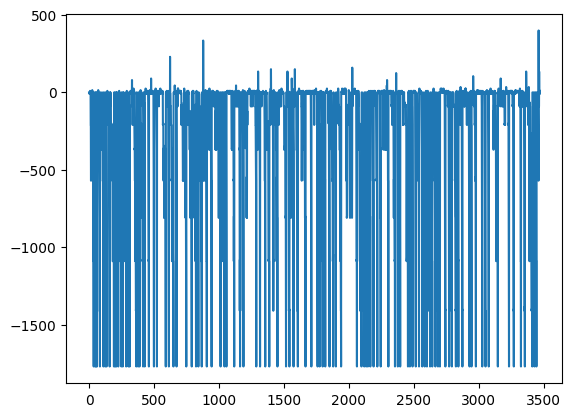

In [11]:
plt.plot(rewards)

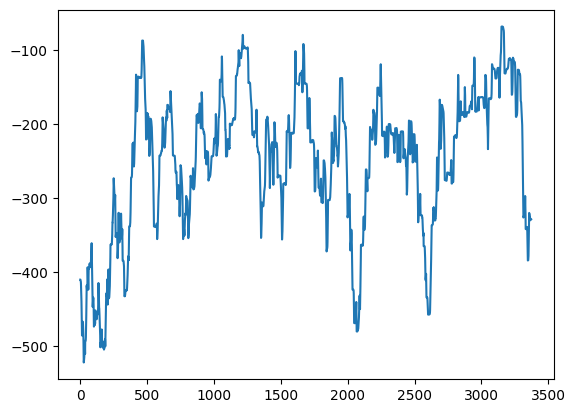

In [13]:
plt.plot([np.average(np.array(rewards)[i:i+100]) for i in range(len(rewards)-100)])

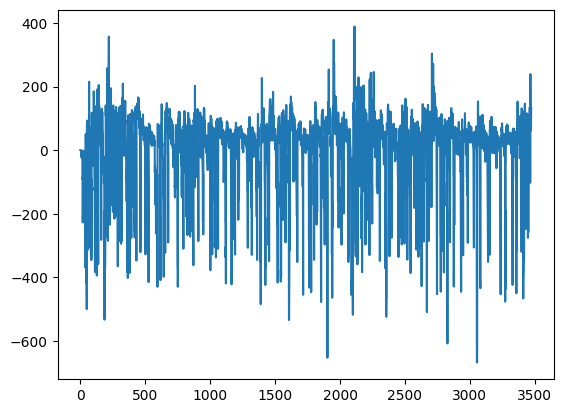

In [14]:
plt.plot(diffs)

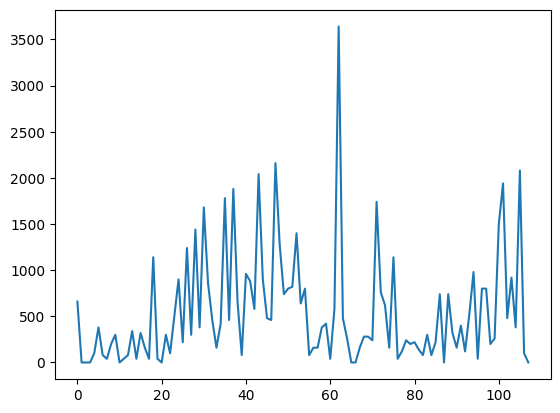

In [15]:
plt.plot(scores)

In [8]:
model = pypumila.Pumila2.make_shared(0.01, 0.9, 0.01)
model.load_file()

In [14]:
sim = pypumila.GameSim()
win = pypumila.Window(sim)
win.step(False, False)

In [63]:
print(model.main.forward(model.get_in_nodes(sim.field).in_nodes).q)
a = model.get_action(sim)
sim.put(pypumila.actions[a])
while not sim.is_free_phase():
    # sim.step()
    win.step(True, False)
for i in range(30):
    win.step(True, False)

[-2061.37949936 -2039.89598264 -2039.53249788 -2018.4075444
 -2044.99971113 -2029.17908492 -2061.3377219  -2039.63921318
 -2017.26691945 -2017.50702417 -2044.87107393 -2029.53312144
 -2047.81006267 -2007.14005729 -2034.05562135 -2026.86631552
 -2036.28240792 -2048.01475352 -2037.27972499 -2003.89301915
 -2035.05804775 -2028.05365621]


In [64]:
win.quit()

In [ ]:
for e2 in range(50):
    a = model.get_action(sim)
    sim.put(pypumila.actions[a])
    while not sim.is_free_phase():
        # sim.step()
        win.step(True, False)
    for i in range(30):
        win.step(True, False)
    # print_sim()

In [18]:
win.quit()

In [62]:
sim = pypumila.GameSim()
win2 = pypumila.Window(sim)
for e2 in range(20):
    q = model_first.forward(sim)
    a = np.argmax(np.array(q))
    sim.put(pypumila.actions[a])
    while not sim.is_free_phase():
        # sim.step()
        win2.step(True, False)
    for i in range(30):
        win2.step(True, False)

In [39]:
win2.quit()